In [1]:
import pandas as pd
df = pd.read_csv('Clicked Ads Dataset.csv')

In [2]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [4]:
#Descriptive Statistic for numerical data
print("\nDescriptive Statistic for numerical data:")
df.describe()


Descriptive Statistic for numerical data:


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [5]:
# Descriptive Statistic for categorical data
print("\nDescriptive Statistic for categorical data:")
df.describe(include=['object'])


Descriptive Statistic for categorical data:


,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_8628\2516930276.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=click_counts.index, y=click_counts.values, palette='Blues')


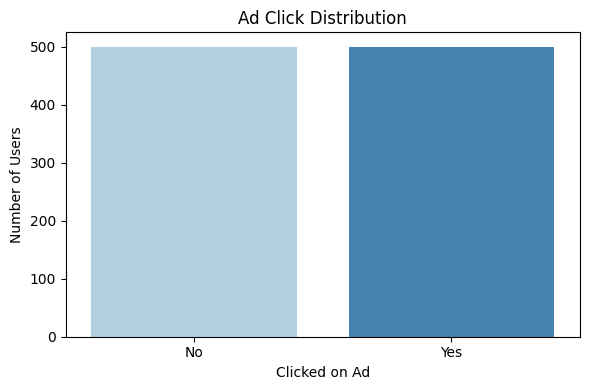

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Clicked on Ad'] = df['Clicked on Ad'].astype(str)

# Count user
click_counts = df['Clicked on Ad'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=click_counts.index, y=click_counts.values, palette='Blues')
plt.title('Ad Click Distribution')
plt.xlabel('Clicked on Ad')
plt.ylabel('Number of Users')
plt.xticks([0,1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


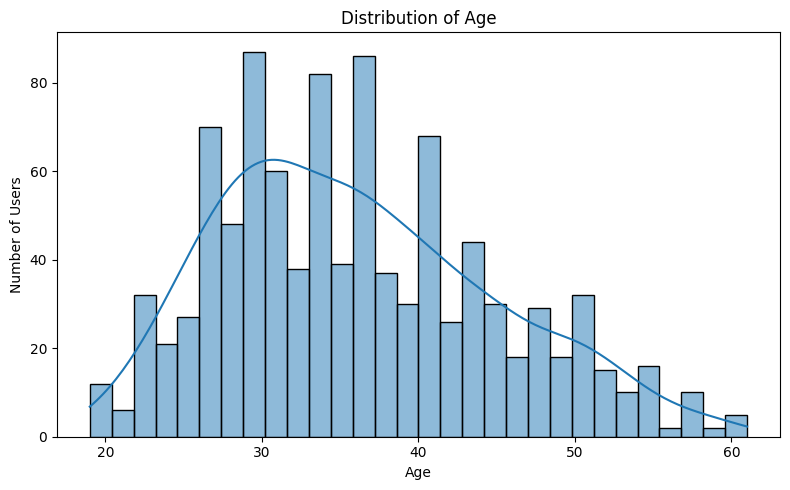

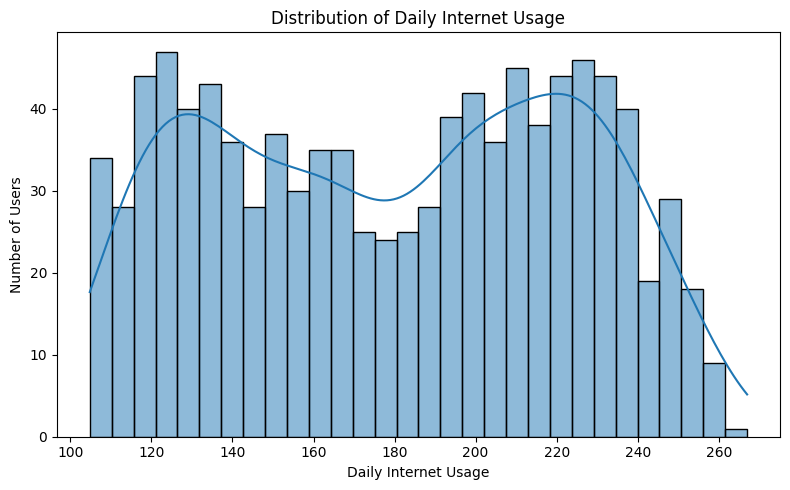

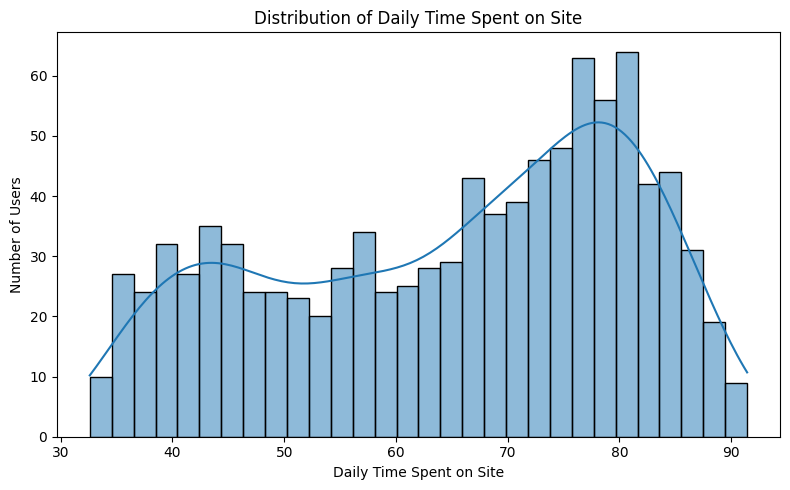

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to analyze
columns_to_analyze = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']

# Plot distribution distinguishing users who clicked and did not click ads
for col in columns_to_analyze:
    plt.figure(figsize=(8,5))
    sns.histplot(
        data=df, 
        x=col, 
        kde=True, 
        multiple="stack", 
        bins=30,
        legend=True  # force legend to appear
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Users')
    plt.tight_layout()
    plt.show()


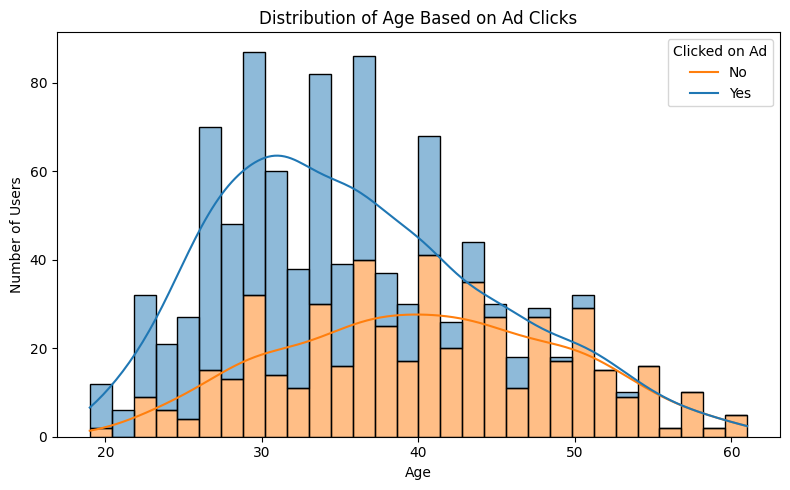

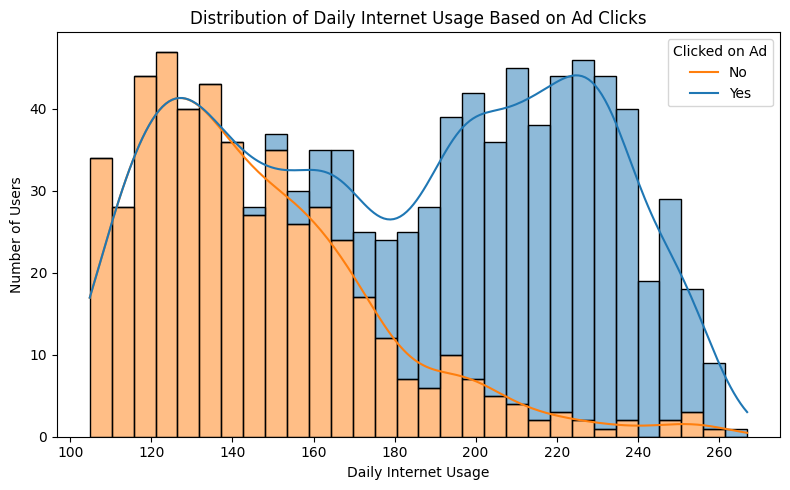

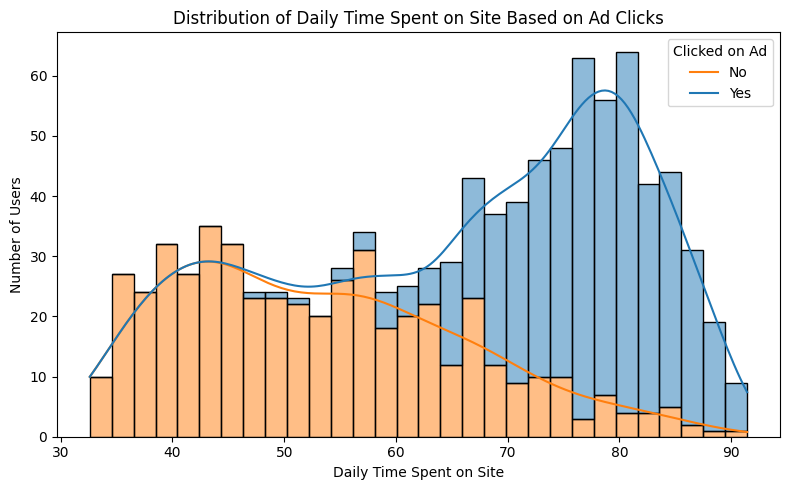

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Clicked on Ad' column is string so legend is readable
df['Clicked on Ad'] = df['Clicked on Ad'].astype(str)

# Columns to analyze
columns_to_analyze = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']

# Plot distribution distinguishing users who clicked and did not click the ad
for col in columns_to_analyze:
    plt.figure(figsize=(8,5))
    sns.histplot(
        data=df, 
        x=col, 
        hue='Clicked on Ad', 
        kde=True, 
        multiple="stack", 
        bins=30,
        legend=True
    )
    plt.title(f'Distribution of {col} Based on Ad Clicks')
    plt.xlabel(col)
    plt.ylabel('Number of Users')
    plt.legend(title='Clicked on Ad', labels=['No', 'Yes'])  # Manual label
    plt.tight_layout()
    plt.show()


In [9]:
# Statistic analyze
stats_by_click = df.groupby('Clicked on Ad')[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']].agg(['mean', 'median', 'std', 'min', 'max'])
stats_by_click


Age                          Daily Internet Usage          \
                 mean median       std min max                 mean  median   
Clicked on Ad                                                                 
No             31.684   31.0  6.212998  19  53           214.595233  216.50   
Yes            40.334   40.0  8.856598  19  61           145.342077  138.79   

                                         Daily Time Spent on Site          \
                     std     min     max                     mean  median   
Clicked on Ad                                                               
No             23.963085  146.19  267.01                76.787805  77.615   
Yes            29.582051  104.78  258.62                53.143111  51.500   

                                        
                     std    min    max  
Clicked on Ad                           
No              7.557988  48.22  91.43  
Yes            12.847803  32.60  91.37

In [10]:
# Count Number of users
count_summary = df.groupby('Clicked on Ad')[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']].count()
count_summary


,Age,Daily Internet Usage,Daily Time Spent on Site
Clicked on Ad,,,
No,500,493,492
Yes,500,496,495


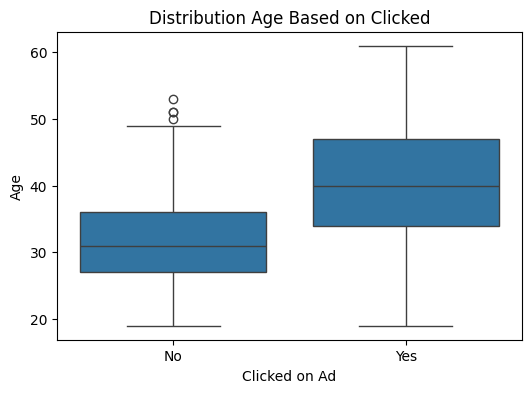

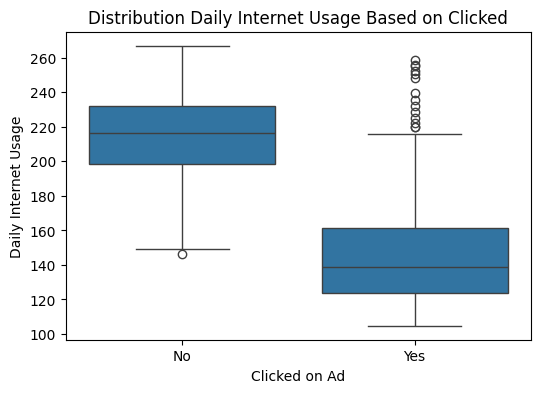

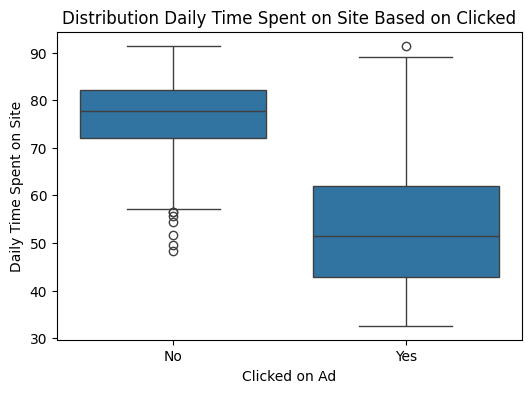

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Clicked on Ad', y=col)
    plt.title(f'Distribution {col} Based on Clicked')
    plt.xlabel('Clicked on Ad')
    plt.ylabel(col)
    plt.show()


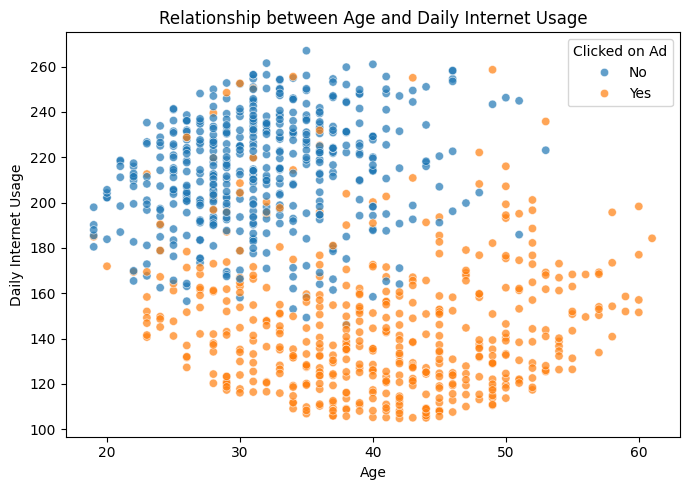

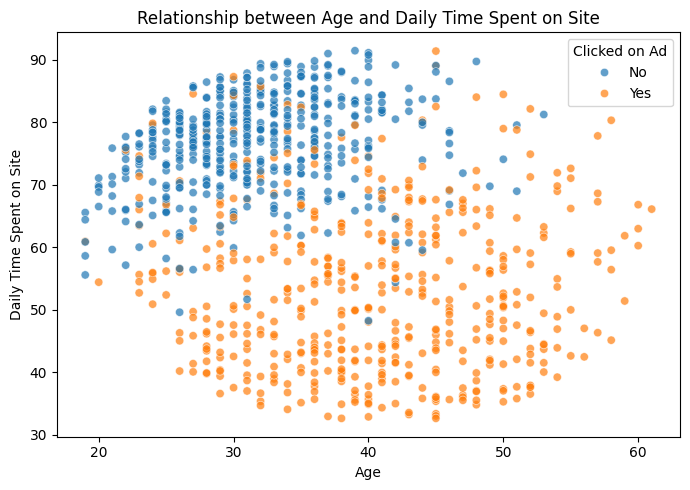

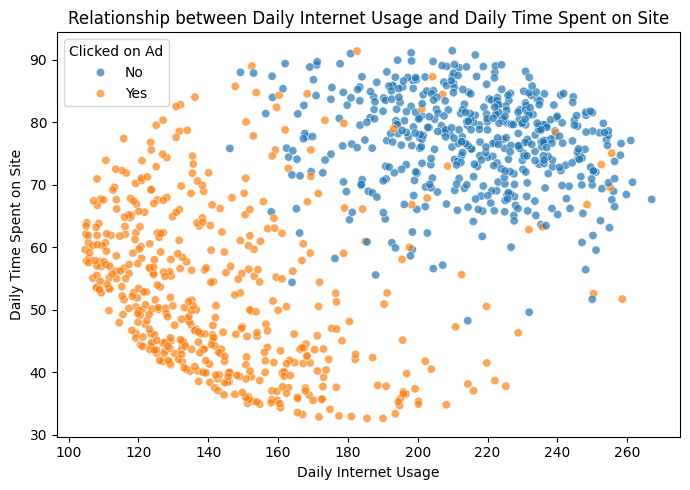

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot Age vs Daily Internet Usage
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Age', y='Daily Internet Usage', hue='Clicked on Ad', alpha=0.7)
plt.title('Relationship between Age and Daily Internet Usage')
plt.xlabel('Age')
plt.ylabel('Daily Internet Usage')
plt.legend(title='Clicked on Ad')
plt.tight_layout()
plt.show()

# Scatter plot Age vs Daily Time Spent on Site
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', alpha=0.7)
plt.title('Relationship between Age and Daily Time Spent on Site')
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site')
plt.legend(title='Clicked on Ad')
plt.tight_layout()
plt.show()

# Scatter plot Daily Internet Usage vs Daily Time Spent on Site
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', hue='Clicked on Ad', alpha=0.7)
plt.title('Relationship between Daily Internet Usage and Daily Time Spent on Site')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Daily Time Spent on Site')
plt.legend(title='Clicked on Ad')
plt.tight_layout()
plt.show()


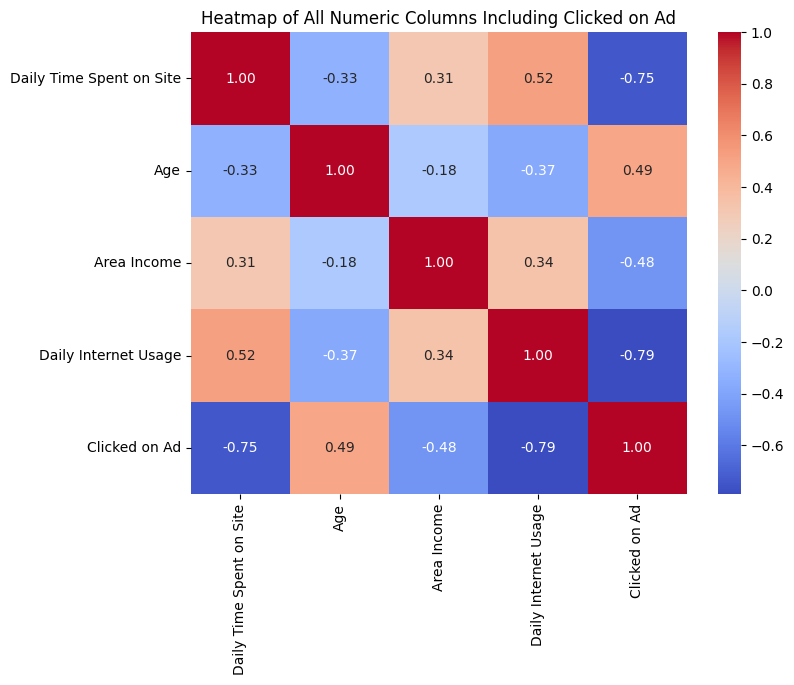

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331424,0.308266,0.518294,-0.746514
Age,-0.331424,1.000000,-0.179343,-0.370481,0.492531
Area Income,0.308266,-0.179343,1.000000,0.338080,-0.477576
Daily Internet Usage,0.518294,-0.370481,0.338080,1.000000,-0.789693
Clicked on Ad,-0.746514,0.492531,-0.477576,-0.789693,1.000000


In [13]:
# Ensure 'Clicked on Ad' column is numeric for correlation (Yes=1, No=0)

df_corr = df.copy()
df_corr = df_corr.drop(columns=['Unnamed: 0'], errors='ignore')
df_corr['Clicked on Ad'] = df_corr['Clicked on Ad'].map({'Yes': 1, 'No': 0})

# Select all numeric columns including Clicked on Ad
numeric_cols_with_click = df_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate correlation matrix
corr_matrix_with_click = df_corr[numeric_cols_with_click].corr()

# Visualize heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_with_click, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of All Numeric Columns Including Clicked on Ad")
plt.show()

corr_matrix_with_click


In [14]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

results = []
df_corr.rename(columns={'Male': 'Gender'}, inplace=True)

# Define numeric & categorical columns
numeric_cols = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Area Income']
categorical_cols = ['Gender', 'category', 'province', 'city']

# 1️⃣ T-Test: Numerical variables with 2-group categories
for col in numeric_cols:
    # Clicked on Ad
    t_stat, p_val = ttest_ind(df_corr[df_corr['Clicked on Ad']==1][col].dropna(),
                              df_corr[df_corr['Clicked on Ad']==0][col].dropna())
    results.append(["T-Test", f"{col} ~ Clicked on Ad", t_stat, p_val])
    
    # Gender
    if set(df_corr['Gender'].dropna().unique()) >= {'Male','Female'}:
        t_stat, p_val = ttest_ind(df_corr[df_corr['Gender']=='Male'][col].dropna(),
                                  df_corr[df_corr['Gender']=='Female'][col].dropna())
        results.append(["T-Test", f"{col} ~ Gender", t_stat, p_val])

# 2️⃣ ANOVA: Numerical variables with categories > 2 groups
for cat in categorical_cols:
    if df_corr[cat].nunique() > 2:
        for col in numeric_cols:
            groups = [g[col].dropna() for _, g in df_corr.groupby(cat)]
            if len(groups) > 1:
                f_stat, p_val = f_oneway(*groups)
                results.append(["ANOVA", f"{col} ~ {cat}", f_stat, p_val])

# 3️⃣ Chi-Square: Categorical variables vs Clicked on Ad
for cat in categorical_cols:
    chi_table = pd.crosstab(df_corr[cat], df_corr['Clicked on Ad'])
    chi2_stat, p_val, dof, ex = chi2_contingency(chi_table)
    results.append(["Chi-Square", f"{cat} vs Clicked on Ad", chi2_stat, p_val])

# 📌 Create a DataFrame of results
df_results = pd.DataFrame(results, columns=["Test", "Variable", "Statistic", "p-value"])
df_results["Statistic"] = df_results["Statistic"].round(3)
df_results["p-value"] = df_results["p-value"].apply(lambda x: "{:.3e}".format(x))
df_results["Conclusion"] = df_results["p-value"].apply(lambda p: "Significant (p<0.05)" if float(p) < 0.05 else "Not Significant")

df_results


,Test,Variable,Statistic,p-value,Conclusion
0,T-Test,Age ~ Clicked on Ad,17.879,3.130e-62,Significant (p<0.05)
1,T-Test,Daily Internet Usage ~ Clicked on Ad,-40.439,1.207e-211,Significant (p<0.05)
2,T-Test,Daily Time Spent on Site ~ Clicked on Ad,-35.212,1.774e-176,Significant (p<0.05)
3,T-Test,Area Income ~ Clicked on Ad,-17.060,2.260e-57,Significant (p<0.05)
4,ANOVA,Age ~ category,1.045,4.015e-01,Not Significant
5,ANOVA,Daily Internet Usage ~ category,0.331,9.650e-01,Not Significant
6,ANOVA,Daily Time Spent on Site ~ category,0.673,7.342e-01,Not Significant
7,ANOVA,Area Income ~ category,1.696,8.547e-02,Not Significant
8,ANOVA,Age ~ province,0.775,7.062e-01,Not Significant
9,ANOVA,Daily Internet Usage ~ province,1.496,9.933e-02,Not Significant


In [15]:
# Check for missing values
import pandas as pd

# Drop 'Unnamed' column if exists
df_clean = df_corr.drop(columns=['Unnamed: 0'], errors='ignore')

# 1️⃣ Check missing values per column
missing_counts = df_clean.isnull().sum()
missing_percent = (missing_counts / len(df_clean)) * 100

# 2️⃣ Combine count and percentage information
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent.round(2)
})

# 3️⃣ Display the result
missing_summary


,Missing Values,Percentage (%)
Daily Time Spent on Site,13,1.3
Age,0,0.0
Area Income,13,1.3
Daily Internet Usage,11,1.1
Gender,3,0.3
Timestamp,0,0.0
Clicked on Ad,0,0.0
city,0,0.0
province,0,0.0
category,0,0.0


In [16]:
# ✅ Fill missing values in df_clean with updated column names
df_clean['Daily Time Spent on Site'] = df_clean['Daily Time Spent on Site'].fillna(df_clean['Daily Time Spent on Site'].mean())
df_clean['Area Income'] = df_clean['Area Income'].fillna(df_clean['Area Income'].mean())
df_clean['Daily Internet Usage'] = df_clean['Daily Internet Usage'].fillna(df_clean['Daily Internet Usage'].mean())
df_clean['Gender'] = df_clean['Gender'].fillna(df_clean['Gender'].mode()[0])  

In [17]:
#extract datetime

from datetime import datetime as dt
def extract_day_of_week(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').weekday()

def extract_day_of_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').day

def extract_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').month


In [18]:
df_clean['day_of_week'] = df_clean['Timestamp'].apply(extract_day_of_week)
df_clean['day_of_month'] = df_clean['Timestamp'].apply(extract_day_of_month)
df_clean['month'] = df_clean['Timestamp'].apply(extract_month)

df_clean = df_clean.drop(labels=['Timestamp'],axis=1)

In [19]:
counts = df_clean.groupby(['day_of_week','Clicked on Ad'],as_index=False).size()

In [20]:
#feature selection
import numpy as np
X = df_clean.drop(labels=['Clicked on Ad'],axis=1)
y = np.where(df['Clicked on Ad']=='No',0,1)

In [21]:
#Dummies for categorical
X_dummy = pd.get_dummies(X)

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [23]:
#split train test
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,test_size = 0.3,stratify=y,random_state = 123)


In [24]:
# Check outliers
import numpy as np

# Select numeric columns
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

outlier_summary = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    count_outliers = len(outliers)
    percent_outliers = (count_outliers / len(df_clean)) * 100
    
    outlier_summary[col] = {
        'Outlier Count': count_outliers,
        'Percentage (%)': round(percent_outliers, 2)
    }

# Convert to DataFrame for summary
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)

                          Outlier Count  Percentage (%)
Daily Time Spent on Site            0.0             0.0
Age                                 0.0             0.0
Daily Internet Usage                0.0             0.0


   Count  Percentage (%)
1    350            50.0
0    350            50.0


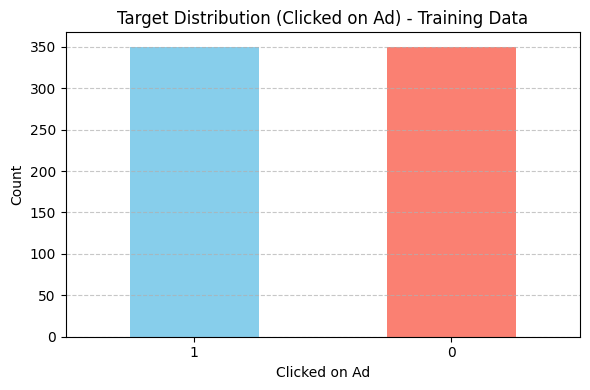

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# pastikan y_train jadi Series
y_train = pd.Series(y_train)

# Calculate class distribution
train_counts = y_train.value_counts()
train_percent = y_train.value_counts(normalize=True) * 100

# Create summary table
imbalanced_train_df = pd.DataFrame({
    'Count': train_counts,
    'Percentage (%)': train_percent.round(2)
})
print(imbalanced_train_df)

# Visualize bar plot
plt.figure(figsize=(6,4))
train_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title('Target Distribution (Clicked on Ad) - Training Data')
plt.xlabel('Clicked on Ad')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
print('Dimensi Train:',X_train.shape)
print('Dimensi Test:',X_test.shape)

Dimensi Train: (700, 65)
Dimensi Test: (300, 65)


In [27]:
def experiment(X_train, X_test, y_train, y_test):
    from collections import defaultdict
    from datetime import datetime as dt
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    
    list_model = [
        ('K-Nearest Neighbor', knn),
        ('Logistic Regression', logreg),
        ('Decision Tree', dtc),
        ('Random Forest', rf),
        ('Gradient Boosting', grad)
    ]
    
    for model_name, model in list_model:
        start = dt.now()
        model.fit(X_train, y_train)
        duration = (dt.now() - start).total_seconds()
        
        # Predict on test and train
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
        # Test metrics
        acc_test = accuracy_score(y_test, y_pred_test)
        rec_test = recall_score(y_test, y_pred_test)
        prec_test = precision_score(y_test, y_pred_test)
        
        # Train metrics
        acc_train = accuracy_score(y_train, y_pred_train)
        rec_train = recall_score(y_train, y_pred_train)
        prec_train = precision_score(y_train, y_pred_train)
        
        # Save to result
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy_train'].append(acc_train)
        result['recall_train'].append(rec_train)
        result['precision_train'].append(prec_train)
        result['accuracy_test'].append(acc_test)
        result['recall_test'].append(rec_test)
        result['precision_test'].append(prec_test)
        result['duration'].append(duration)
        
    return result


In [28]:
#no standardization
result = experiment(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)

In [29]:
result

,model_name,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.752857,0.722857,0.768997,0.696667,0.640000,0.721805,0.008988
1,Logistic Regression,LogisticRegression(),0.745714,0.614286,0.833333,0.683333,0.526667,0.766990,0.095459
2,Decision Tree,DecisionTreeClassifier(),1.000000,1.000000,1.000000,0.946667,0.926667,0.965278,0.018834
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,1.000000,1.000000,0.946667,0.933333,0.958904,0.659678
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,1.000000,1.000000,1.000000,0.933333,0.913333,0.951389,1.036766


In [30]:
#experiment2
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [31]:
result2 = experiment(X_train_minmax,X_test_minmax,y_train,y_test)
result2 = pd.DataFrame(result2)

In [32]:
#evaluation
final_model = result2['model'][3]
y_pred = final_model.predict(X_test_minmax)

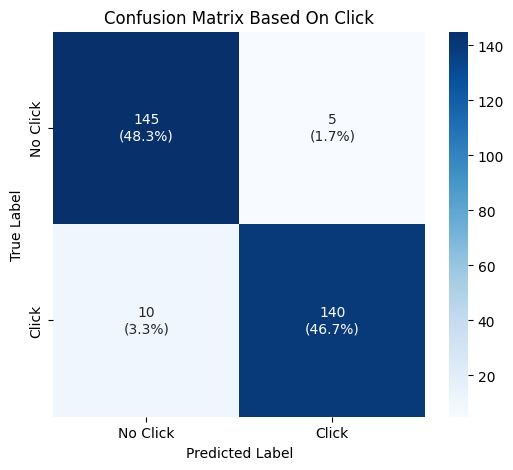

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Contoh: hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hitung persentase
cm_percent = cm.astype('float') / cm.sum() * 100

# Gabungkan angka asli dan persentase ke satu string
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)"

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=annot, fmt='', cmap="Blues", cbar=True,
            xticklabels=['No Click', 'Click'],
            yticklabels=['No Click', 'Click'])

plt.title("Confusion Matrix Based On Click")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [34]:
result2

,model_name,model,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.891429,0.874286,0.905325,0.800000,0.740000,0.840909,0.000000
1,Logistic Regression,LogisticRegression(),0.984286,0.971429,0.997067,0.940000,0.900000,0.978261,0.042395
2,Decision Tree,DecisionTreeClassifier(),1.000000,1.000000,1.000000,0.943333,0.933333,0.952381,0.015786
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,1.000000,1.000000,0.950000,0.933333,0.965517,0.626824
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,1.000000,1.000000,1.000000,0.930000,0.913333,0.944828,0.972814


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

# Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Buat model dasar
rf_model = RandomForestClassifier(random_state=42)

# Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Model terbaik dari GridSearch
best_rf = grid_search.best_estimator_

# Prediksi pada training dan testing
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Hitung metrik pada training data
acc_train = accuracy_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)

# Hitung metrik pada testing data
acc_test = accuracy_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)

# Cetak hasil
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)
print("\n=== Training Metrics ===")
print(f"Accuracy: {acc_train:.4f}")
print(f"Recall:   {rec_train:.4f}")
print(f"Precision:{prec_train:.4f}")

print("\n=== Testing Metrics ===")
print(f"Accuracy: {acc_test:.4f}")
print(f"Recall:   {rec_test:.4f}")
print(f"Precision:{prec_test:.4f}")


D:\DataScience\InstalasiAnaconda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
435 fits failed with the following error:
Traceback (most recent call last):
  File "D:\DataScience\InstalasiAnaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\DataScience\InstalasiAnaconda\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "D:\DataScience\InstalasiAnaconda\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "D:\Data

Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9771468398077839

=== Training Metrics ===
Accuracy: 1.0000
Recall:   1.0000
Precision:1.0000

=== Testing Metrics ===
Accuracy: 0.9567
Recall:   0.9400
Precision:0.9724


In [36]:
#feature importance
feature_imp = {}

feature_imp['columns'] = X_train.columns
feature_imp['feature_imp'] = result2['model'][3].feature_importances_

In [37]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(20)

<Axes: xlabel='feature_imp', ylabel='columns'>

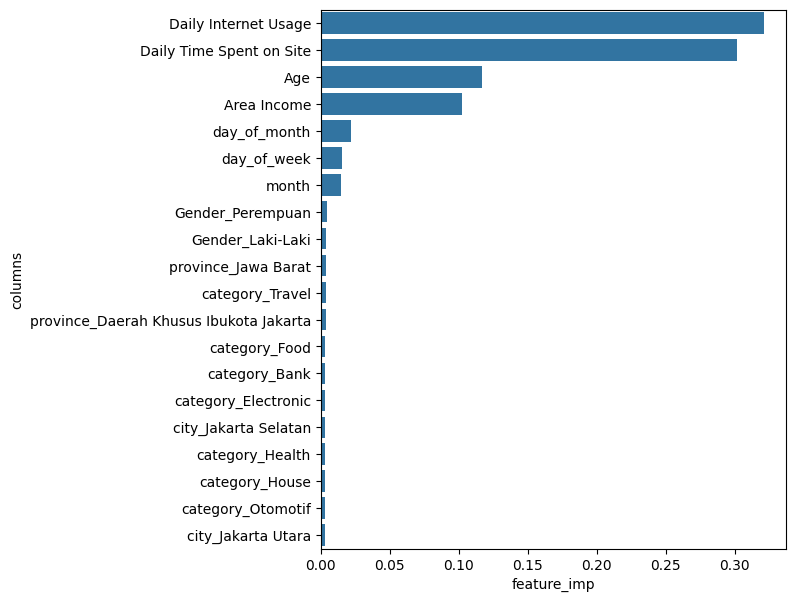

In [38]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])

In [39]:
#simulation

X_test.shape

(300, 65)

In [40]:
# Jumlah kelas pada setiap data
jum_class = pd.Series(y_test).value_counts()
jum_class

1    150
0    150
Name: count, dtype: int64

In [41]:
#simulation